In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

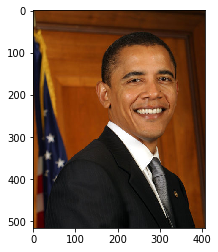

In [2]:
data = pd.read_csv('HW2_data/1/hw2-image.txt',sep=' ', header=None).values
pic = data.reshape(516, 407, 3)
plt.imshow(pic)

In [3]:
def find_cluster(data, cents):
    temp = np.linalg.norm(data[:, np.newaxis, :] - cents[np.newaxis, :, :], axis=2)
    p_clusters = np.argmin(temp, axis=1)
    cluster_dict = {i:[] for i in range(len(cents))}
    for i,o in enumerate(p_clusters): cluster_dict[o].append(i)
    return cluster_dict

def comp_cent(data, cents_dict):
    new_cents = np.array([np.mean(data[o, :], axis=0) for i,o in cents_dict.items()])
    loss = np.mean( [ np.linalg.norm(data[oo,:]-new_c)**2 for new_c,(_, o) in zip(new_cents, cents_dict.items()) for oo in o])
    return new_cents, loss

In [4]:
%%time
print("This will take more than 40 epoch to run")
cents = None
new_cents = np.array([[255, 255, 255], [255, 0, 0], [128, 0, 0], [0, 255, 0], [0, 128, 0], [0, 0, 255], [0, 0, 128], [0, 0, 0]])

epoch = 0
dis = []
while np.sum(new_cents!=cents) != 0:
    epoch += 1
    if epoch % 10==0: print('epoch: ', epoch, 'loss: ', distance)
    cents = new_cents
    cents_dict = find_cluster(data, cents)
    # remove clusters without points
    cents_dict = {k:v for k,v in cents_dict.items() if len(v)>0}
    new_cents, distance = comp_cent(data, cents_dict)
    dis.append(distance)

This will take more than 40 epoch to run


/Users/pengfei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


epoch:  10 loss:  617.1898616252524
epoch:  20 loss:  616.3118549852202
epoch:  30 loss:  563.0051505390211
epoch:  40 loss:  561.3322603285644
CPU times: user 1min 42s, sys: 3.92 s, total: 1min 46s
Wall time: 1min 17s


## a.

In [8]:
print(f'There are {len(new_cents)} clusters in the end')

There are 6 clusters in the end


## b.

In [9]:
print(f'Final centroid are: \n ')
for i, o in enumerate(new_cents):
    print(f'cluster {i}: {o}')

Final centroid are: 
 
cluster 0: [241.2296146  238.62515213 233.86288032]
cluster 1: [194.41158657 136.33311389  90.94364714]
cluster 2: [136.2655563   61.08973066  10.10385457]
cluster 3: [157.29173273  97.59397508  51.43329558]
cluster 4: [78.92743714 37.10828688 13.07070482]
cluster 5: [25.97800232 23.23575423 23.60599063]


## c.

In [10]:
print('number of pixel for each cluster is \n{}'.format({'cluster '+str(k):len(v) for k, v in cents_dict.items()}))

number of pixel for each cluster is 
{'cluster 0': 4930, 'cluster 1': 15190, 'cluster 2': 52535, 'cluster 3': 22075, 'cluster 4': 40365, 'cluster 5': 74917}


## d.

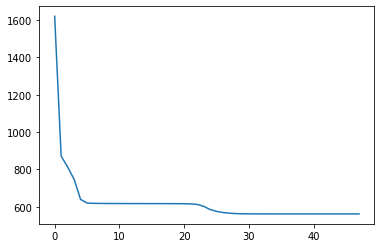

In [11]:
plt.plot(range(epoch), dis)

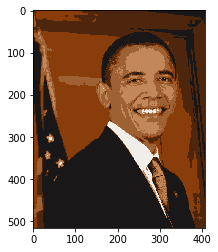

In [12]:
for k, v in cents_dict.items(): data[v, :] = cents[k]
pic = data.reshape(516, 407, 3)
plt.imshow(pic)